# Optical Autocorrelation:

Interferometric Autocorrelation (IAC):

In a collinear geometry, the interferometric autocorrelation signal with delay $\tau$  is 

$I_M(\tau) = \int_{-\infty}^\infty |(E(t) + E(t-\tau))^2|^2 dt$   

which contains fringes in the autocorrelation trace and provides some information about the phase of pulse.

$I_M(\tau) = I_{back} + I_{int}(\tau) + I_\omega(\tau) + I_{2\omega}(\tau)$ \\ 
$= 2\int_{-\infty}^{\infty} I(t)^2 dt$ \\
$+  4 \int_{-\infty}^{\infty} I(t) I(t-\tau) dt$ \\
$+  4 \int_{-\infty}^{\infty}[I(t) + I(t-\tau)] Re[E(t) E^*(t-\tau)] dt$ \\
$+  2 \int_{-\infty}^{\infty} Re[E^2(t) E^{*2}(t-\tau) dt $

where $I_{int}(\tau) = \int_{-\infty}^{\infty} I(t) I(t-\tau) dt$ relates to the intensity autocorrelation. 

A Gaussian pulse with linear chirp $\beta$ is 

$E(t) = e^{-2log(2)(t/t_{fwhm})^2} e^{-j\omega_0 t} e^{-j\beta(t/t_{fwhm})^2}$

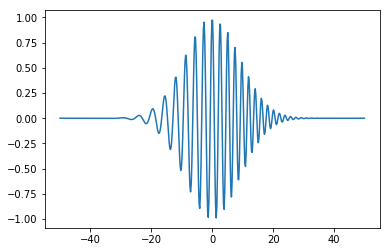

In [105]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

#Pulse profile
t=np.linspace(-50,50,500) #in fs
dt=t[1]-t[0]
t0=15. #fs fwhm
b=5.
wl=800 #nm
w0=2*np.pi*3e2/wl #in 1/fs
E_t=np.exp(-2*np.log(2)*(t/t0)**2)*np.exp(-1j*w0*t)*np.exp(-1j*b*(t/t0)**2) #linear chirp
I_t=np.abs(E_t)**2
plt.plot(t, np.real(E_t))

In [106]:
IAC_constant=2*sum(I_t**2)
IAC_intensity=4*signal.correlate(I_t,I_t,mode="same")
IAC_1w_dump=signal.correlate(I_t*E_t,E_t,mode="same")+signal.correlate(E_t,I_t*E_t,mode="same")
IAC_1w=2*IAC_1w_dump+2*np.conj(IAC_1w_dump)
IAC_2w_dump=signal.correlate(E_t**2,E_t**2,mode="same")
IAC_2w = IAC_2w_dump+np.conj(IAC_2w_dump)
IAC=IAC_constant+IAC_intensity+IAC_1w+IAC_2w
IAC=abs(IAC)
IAC=8*IAC/max(IAC)

Text(0,0.5,'relative Intensity')

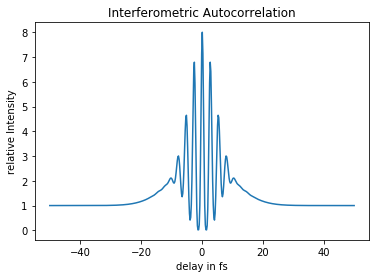

In [107]:
plt.plot(t,IAC)
plt.title('Interferometric Autocorrelation')
plt.xlabel('delay in fs')
plt.ylabel('relative Intensity')

In normalized interferometric autocorrelation trace,the peak to background ratio is 8:1.

The fourier transform of the inteferometric autocorrelator trace gives components as :

(0, 1.25)

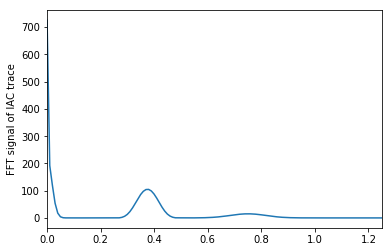

In [108]:
import scipy.fftpack as fft
freq = fft.fftfreq(len(t), t[1]-t[0])
fw = fft.fft(IAC)
ids = np.where(freq>=0)
plt.plot(freq[ids], np.abs(fw[ids]))
plt.ylabel("FFT signal of IAC trace")
plt.xlim([0,1.25])

The IAC trace is sensitive to chirp of pulse. For chirped pulse, to extract the pulse duration from IAC trace, the $1\omega$ and $2\omega$ components need to be substracted from the trace.

In [46]:
def freq_filter_end(y, x, f1, f2, mode = 0):
    """"
    f1,f2 :
        Values of ends of bands

    mode :
        0 for includes the box window, otherwise rejects window

    Returns :  (x, ry)
    """     
    st = x[-1]-x[0] #sampling time
    f1 = round(f1*st)
    f2 = round(f2*st)
    N = y.size
    fy = fft.fft(y)
 
    g = np.zeros(N)
    i1 = int(f1)
    i2 = int(f2)           
    #from i1 to i2 
    g[i1:i2+1] = 1
    #from N-i2 to N-i1
    g[N-i2:N-i1+1] = 1            
    if mode !=0:
        g = 1-g
    fy = fy*g
    ry = np.real(fft.ifft(fy))
    return x,ry

In [109]:
x, y = freq_filter_end(IAC, t, 0, 0.2, 0)
y = (y-y.min())/(y.max()-y.min())

The fourier frequency selection can be performed using a window of given shape like gaussian window.

$I_{int}(\tau) = \int_{-\infty}^\infty I(t) I(t-\tau) dt $

In [111]:
#direct intensity autocorrelation
int_auto = signal.correlate(I_t,I_t,mode="same")

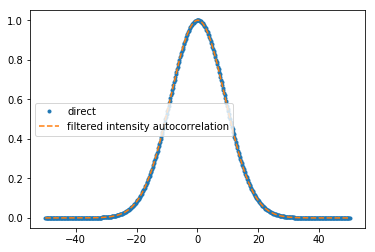

In [117]:
plt.plot(t, int_auto/max(int_auto),'.', label='direct')
plt.plot(x, y,'--',label='filtered intensity autocorrelation')
plt.legend()